# #The Spark foundation - GRIP(Graduate Rotational Internship Program)

## #Data Science and Business Analytics Internship
### by - Debargho Chatterjee Ganguly

## Task 1 : Prediction Using Supervised ML

### Problem Statement : Predict the Percentage of an student based on the no. of study hours. 

### Importing Libraries and Dataset 

In [1]:
#Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Dataset
path = "http://bit.ly/w-data"
df = pd.read_csv(path)
print("Data is Successfully Imported")
df

Data is Successfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### First Five Rows of the Dataset

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Structure and Aspects of the Dataset

In [7]:
#Statistical Details of the Dataset
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [9]:
#Full Summary of the Dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [10]:
#Shape of the Dataset
print(df.shape)

(25, 2)


In [11]:
#Total Count and Data type
df.count()

Hours     25
Scores    25
dtype: int64

In [12]:
#Checking for NULL values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualization

#### Representation through Boxplot

<AxesSubplot:xlabel='Hours'>

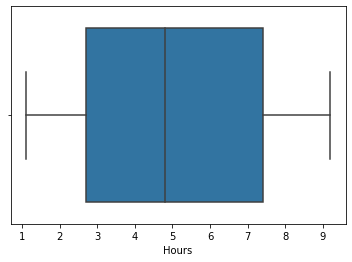

In [15]:
sns.boxplot(x = df['Hours'])

<AxesSubplot:xlabel='Scores'>

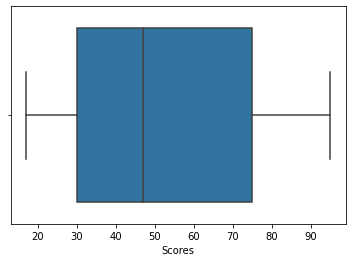

In [21]:
sns.boxplot(x = df['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

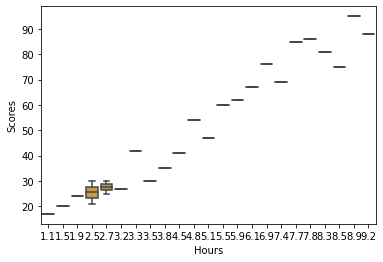

In [18]:
sns.boxplot(x = df['Hours'],y = df['Scores'])

#### Representation Thorugh Scatterplot

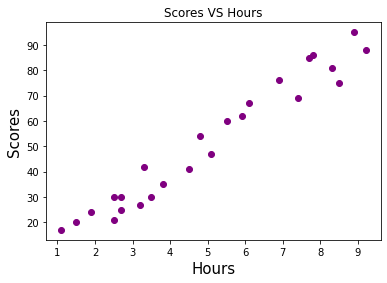

In [31]:
#Plotting the distribution of Scores
plt.scatter(df.Hours,df.Scores,color='purple')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Scores VS Hours",fontsize=12)
plt.show()

#### Representation Thorugh Pairplot 

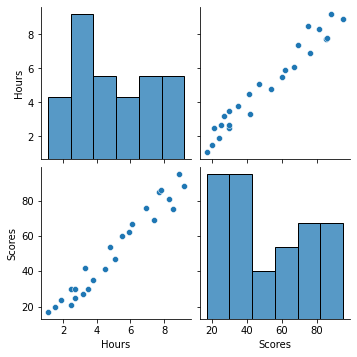

In [22]:
sns.pairplot(df)

#### The Scatterplot indicates positive linear relationship

### Preparing the Data for Analysis

In [29]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Dividing the Dataset into Training and Testing data  

In [32]:
#Slpitting the Data into Training Data and Testing Data 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.2)

In [33]:
#We have Splitted our Data using 80:20 rule(PARETO Principle)
print("x train shape =", x_train.shape)
print("y train shape =", y_train.shape)
print("x test shape =", x_test.shape)
print("y test shape =", y_test.shape)

x train shape = (20, 1)
y train shape = (20,)
x test shape = (5, 1)
y test shape = (5,)


## Training the Model

In [34]:
linreg=LinearRegression()

In [35]:
#Fitting Training Data
linreg.fit(x_train,y_train)
print("Training Sucessfully Completed")

Training Sucessfully Completed


In [36]:
#Printing the Slope and Intercept of the line
print("The Intercept B0 =",linreg.intercept_,"\nThe slope B1 =",linreg.coef_)

The Intercept B0 = 2.018160041434683 
The slope B1 = [9.91065648]


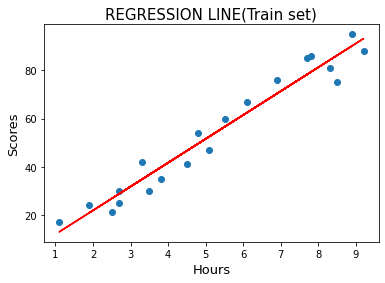

In [37]:
#Plotting the REGRESSION LINE on Train Data
Y0 = linreg.intercept_ + linreg.coef_ * x_train

plt.scatter(x_train,y_train)
plt.plot(x_train,Y0,color="Red")
plt.xlabel("Hours",fontsize=13)
plt.ylabel("Scores",fontsize=13)
plt.title("REGRESSION LINE(Train set)",fontsize=15)
plt.show()

### Comparing the Actutal score with Predicted score

In [38]:
#Predicting the Scores for Test Data
y_pred=linreg.predict(x_test)
print(y_pred)
y_test

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


array([20, 27, 69, 30, 62], dtype=int64)

In [39]:
#Comparing Actual VS Predicted Score
y_test1=list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ "Actual" : y_test1, "Result" : prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Accuracy of the Model

In [40]:
#Goodness of Fit Test
metrics.r2_score(y_test,y_pred)

0.9454906892105356

#### The Above test show our Model is > 94% Accurate which implies our fitted model is a Good Model

### Predicting The Score(using Regression)

In [41]:
Prediction_Score = linreg.predict([[9.25]])
print("The Predicted Score is ",Prediction_Score)

The Predicted Score is  [93.69173249]


## Conclusion  

### From the above Results we can say that if a Student Studies 9.25 hours in a day, then the student can score 93.69 marks 

## Task 1 completed

# THANK YOU